Training set data generation mode: 
  seperable
Training set RNG seed: 
  12345
Epochs: 
  10000 
Step_size / learning_rate:
  0.5
Initial weights vector: 
  [0. 0.]
Batch size: 
  2
Batches per epoch: 
  100
Number of weight updates made: 
  6966
SVM Weights / bias: 
  [0.61588149 1.24407032]  /  0.0
SVM Margin Width: 
  1.4407438507642123
Equation of Negative Support Vector: 
  y = (- 0.615881486748328  * x -  0.0  + 1.0) /  1.2440703236422843
Equation of Positive Support Vector: 
  y = (- 0.615881486748328  * x -  0.0  - 1.0) /  1.2440703236422843
Equation of Decision Boundary: 
  y = (- 0.615881486748328  * x -  0.0 ) /  1.2440703236422843


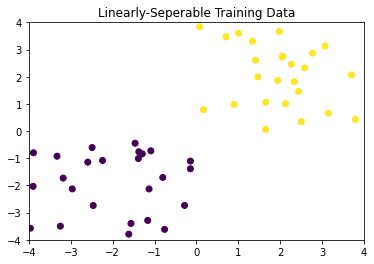

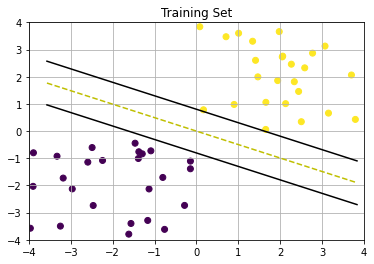

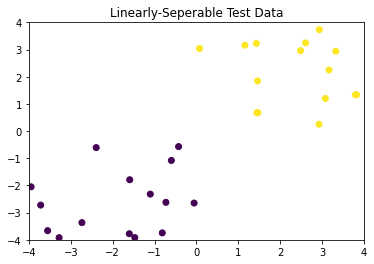

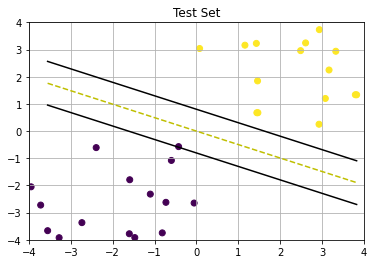

SVM Model Accuracy on test set: 
  1.0
Test Error: 
  0.0


In [ ]:
# Jacob Barger
# CMPSCI 5340
# Project 4
# 11/19/20

# imports
import numpy as np
import matplotlib.pyplot as plt
from math import ceil


#**************** FUNCTION DEFINITIONS ******************

# Function visualize support vectors. Code referenced from the following link
# as the plotting part was not an assignment requirement I figured it would be acceptable to use
# pre-written code for only plotting. All machine learning/remaining code is mine and
# did not use or reference the svm model shown with the same code.
# https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc
def plt_support_vectors(X_train, Y_train, w, b, plot_title):
    colors = {1: 'r', -1: 'b'}
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    X1 = np.c_[np.ones((X_train.shape[0])), X_train]

    postiveX = []
    negativeX = []

    for index, value in enumerate(Y_train):
        if value == -1:
            negativeX.append(X_train[index])
        else:
            postiveX.append(X_train[index])

    class_segment = {-1: np.array(negativeX), 1: np.array(postiveX)}

    min_feature_value = np.amin(X_train)
    max_feature_value = np.amax(X_train)

    plt.scatter(X1[:, 1], X1[:, 2], marker='o', c=Y_train)

    def hyperplane_value(x, w, b, v):
        return (-w[0] * x - b + v) / w[1]

    datarange = (min_feature_value * 0.9, max_feature_value * 1.)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # (w.x+b) = 1
    # positive support vector hyperplane
    if plot_title == "Training Set":
      print("Equation of Negative Support Vector: \n  y = (-", w[0]," * x - ", b," + 1.0) / ", w[1])
    psv1 = hyperplane_value(hyp_x_min, w, b, 1)
    psv2 = hyperplane_value(hyp_x_max, w, b, 1)
    ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    # (w.x+b) = -1
    # negative support vector hyperplane
    if plot_title == "Training Set":
      print("Equation of Positive Support Vector: \n  y = (-", w[0]," * x - ", b," - 1.0) / ", w[1])
    nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
    nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
    ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    # (w.x+b) = 0
    # positive support vector hyperplane
    if plot_title == "Training Set":
      print("Equation of Decision Boundary: \n  y = (-", w[0]," * x - ", b,") / ", w[1])
    db1 = hyperplane_value(hyp_x_min, w, b, 0)
    db2 = hyperplane_value(hyp_x_max, w, b, 0)
    ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

    plt.axis([-4, 4, -4, 4])
    plt.title(plot_title)
    plt.grid()
    plt.show()

# function to generate linearly seperable train data, is randomly
# generated but re-creatable by controlling the seed
def generateSeperableData(n, seed):
    np.random.seed(seed)
    number = int(ceil(n / 2))
    data1 = np.random.uniform(-4, 0, (number, 3))
    data2 = np.random.uniform(0, 4, (number, 3))

    for i in range(number):
        data1[i, 2] = -1
        data2[i, 2] = 1

    data = np.concatenate([data1, data2])
    return data


# function to generate non-linearly seperable train data, is randomly
# generated but re-creatable by controlling the seed
def generateNonSeperableData(n, seed):
    np.random.seed(seed)
    data = np.random.uniform(-4, 4, (n, 3))

    for i in range(n):
        if i % 2 == 0:
            data[i, 2] = 1
        else:
            data[i, 2] = -1
    return data


# function to generate linearly seperable test data, hard coded with seed
# to always be the same
def generateSepTestData(n):
    np.random.seed(11)
    number = int(ceil(n / 2))
    data1 = np.random.uniform(-4, 0, (number, 3))
    data2 = np.random.uniform(0, 4, (number, 3))

    for i in range(number):
        data1[i, 2] = -1
        data2[i, 2] = 1

    data = np.concatenate([data1, data2])
    return data

# approximate class
def predict(X, weights_vector, bias):
    prediction = np.dot(X, weights_vector) - bias
    return np.sign(prediction)

# function to fit data to svm model with regular gradient descent
def fit_svm(X_train, Y_train, epochs, step_size):
    # initialize weights vector to zeroes with size equal number of x features
    w = np.zeros(X_train.shape[1])
    # initialize bias to zero
    b = 0

    # set alpha value to very small to complement step_size
    alpha = 0.001



    # in each epoch iterate over every
    for i in range(0, epochs):
        for index, x_feat in enumerate(X_train):
            check = Y_train[index] * (np.dot(x_feat, w) - b) >= 1
            if check:
                w -= step_size * (2 * alpha * w)
            else:
                w -= step_size * (2 * alpha * w - np.dot(x_feat, Y_train[index]))
                b -= step_size * Y_train[index]
    return w,b

# function to fit data to svm model with stochastic gradient descent
def fit_svm_sgd(X_train, Y_train, epochs, step_size):
    # initialize weights vector to zeroes with size equal number of x features
    w = np.zeros(X_train.shape[1])
    print("Initial weights vector: \n ", w)
    # initialize bias to zero
    b = 0

    # set alpha value to very small to complement step_size
    alpha = 0.001

    # batch size constant and number of times to train on batchs per epoch
    batch_size = 2
    print("Batch size: \n ", batch_size)
    batch_epochs = 100 #int(np.ceil(len(X_train)/batch_size))
    print("Batches per epoch: \n ", batch_epochs)
    updateCount = 0

    # in each epoch iterate over every
    for i in range(0, epochs):
        for i in range(batch_epochs):
            # batch_size number of indexes for stochastic seeding
            index = np.random.randint(0, len(X_train), batch_size)
            # grab samples based off indices to train with
            X_batch = X_train[index]
            Y_batch = Y_train[index]
            for index, X_feat in enumerate(X_batch):
                check = Y_batch[index] * (np.dot(X_feat, w) - b) >= 1
                if check:
                    w -= step_size * (2 * alpha * w)
                else:
                    updateCount+=1
                    w -= step_size * (2 * alpha * w - np.dot(X_feat, Y_batch[index]))
                    b -= step_size * Y_batch[index]
    print("Number of weight updates made: \n ", updateCount)
    return w,b
#************* END OF FUNCTION DEFINITIONS ***************


#************* TRAINING DATA CONFIGURATION ***************
# set number of test points
trainPoints = 50
testPoints = 30

# pick seperable or non-seperable data generation function
# choose "seperable" or "non-seperable"

training_data_mode = "non-seperable"
training_data_mode = "seperable"

print("Training set data generation mode: \n ", training_data_mode)

# choose random or static seed
#seed = np.random.randint(10000)
seed = 12345 
print("Training set RNG seed: \n ", seed)

# generate train data based off parameters
if training_data_mode == "non-seperable":
  X_train = generateNonSeperableData(trainPoints, seed)
  # split labels into y data
  Y_train = X_train[:, -1]
  plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train)
  plt.axis([-4, 4, -4, 4])
  plt.title("Non-Linearly-Seperable Training Data")
else:
  X_train = generateSeperableData(trainPoints, seed)
  # split labels into y data
  Y_train = X_train[:, -1]
  plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train)
  plt.axis([-4, 4, -4, 4])
  plt.title("Linearly-Seperable Training Data")

# remove labels from features
X_train = X_train[:, :-1]

#********** END OF TRAINING DATA CONFIGURATION **************


#*********** MODEL CONFIGURATION AND TRAINING ***************

# set epochs and step size
epochs = 10000
step_size = 0.5
print("Epochs: \n ", epochs, "\nStep_size / learning_rate:\n ", step_size)
# fit model
weights, bias = fit_svm_sgd(X_train, Y_train, epochs, step_size)

print("SVM Weights / bias: \n ", weights, " / ", bias)
print("SVM Margin Width: \n ", 2.0 / np.linalg.norm(weights))

# use SVM weights to generate plots to visualize SVM margin
plt_support_vectors(X_train, Y_train, weights, bias, "Training Set")

#************** END OF MODEL CONFIGURATION ******************


#************ TEST ACCURACY AND VISUALIZATION ***************

#generate consistent and seperate test data
X_test = generateSepTestData(testPoints)
Y_test = X_test[:, -1]
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test)
plt.axis([-4, 4, -4, 4])
plt.title("Linearly-Seperable Test Data")
Y_test = X_test[:, -1]
X_test = X_test[:, :-1]


# evalute performance on test set
predictions = []
size = X_test.shape
for i in range(0,size[0]):
    value = predict(X_test[i], weights, bias)
    if value == Y_test[i]: check = 1
    else: check = 0
    predictions.append(check)

# print prediction accuracy on test set and plot support vectors on test set
plt_support_vectors(X_test, Y_test, weights, bias, "Test Set")
print("SVM Model Accuracy on test set: \n ", np.mean(predictions))
print("Test Error: \n ", 1 - np.mean(predictions))
#********* END OF TEST ACCURACY AND VISUALIZATION ************

In [ ]:
_